### NAME - ABHIJNA S

## TASK-1
## Prediction using Supervised ML
### In this we predict the percentage of an student based on the no. of study hours by applying simple linear regression task as it involves just 2 variables.

### Final output of this task will be the predicted score if a student studies for 9.25 hrs/ day.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
# Importing the dataframe df
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
# To get the generic info of the dataframe we use info function of pandas library
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Checking for missing values in the dataframe
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Checking for an outlier - Outlier is said to be present if the difference between the mean and median is very large ie. if (mean)>2.5(median)
print('Mean_hours: ',df['Hours'].mean())
print('Median_hours: ',df['Hours'].median())

print('Mean_scores: ',df['Scores'].mean())
print('Median_scores: ',df['Scores'].median())

# Because the difference is not that large so there is no outlier

Mean_hours:  5.012
Median_hours:  4.8
Mean_scores:  51.48
Median_scores:  47.0


### Visualization

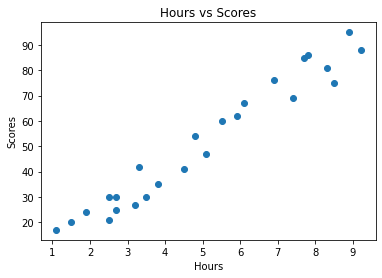

In [6]:
#Hours Vs Percentage of Scores
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Data-preprocessing Steps

In [7]:
# Extracting x and y values from the dataframe
x = df.iloc[ : , :-1].values
y = df.iloc[ : ,-1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [8]:
# Since this is a dataset for supervised ML we need to split the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


### Training the algorithm
We have split our data, now creating and training the linear regression model


In [9]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

In [10]:
# Predicting the scores by giving the x_test inputs

y_pred = lr.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [11]:
# Actual vs Predicted outputs
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# Calculating model accuracy(r2_score) and error(root mean squared error)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mse = mean_absolute_error(y_test, y_pred)
print('Accuracy(r2_score): ',r2_score(y_test,y_pred))
print('Error(Mean Absolute Error): ',mse)
print('Root mean squared error: ',np.sqrt(mse)) 

Accuracy(r2_score):  0.9454906892105355
Error(Mean Absolute Error):  4.183859899002975
Root mean squared error:  2.0454485813637495



### Plotting the training data

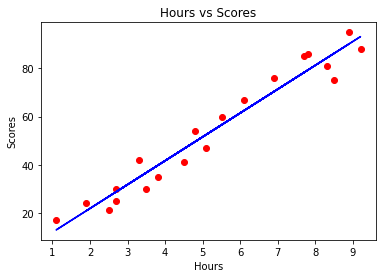

In [13]:
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,lr.predict(x_train),color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Plotting the test data

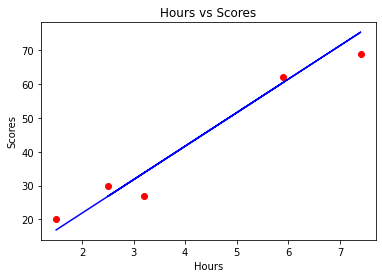

In [14]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,y_pred,color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [15]:
# Now we are finding the the predicted score when a student studies for 9.25 hrs/ day.
df = np.array(9.25)
df = df.reshape(-1, 1)
score_pred = lr.predict(df)
print("Thus the Predicted Score if a student studies for 9.25 hrs/ day is = {}".format(score_pred))

Thus the Predicted Score if a student studies for 9.25 hrs/ day is = [93.69173249]


## Conclusion
### Thus the model is said to have an accuracy of 94.5% which indicates it is a best fit model.
### Thus from the above result we can say that if a student studied for 9.25 hrs/day then his predicted score would be 93.69 .